In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
df = pd.read_csv('../RawData/round1_ijcai_18_train_20180301.txt', sep=' ')

## handle null item

In [96]:
## 查找id，在相同id里以最多的count的进行补全
# mapArray = [('item_sales_level', 'item_id', ['item_sales_level']), 
#             ('user_gender_id', 'user_id', ['user_gender_id']),
#             ('user_age_level', 'user_id', ['user_age_level', 'user_occupation_id', 'user_star_level']),
#             ('shop_review_positive_rate', 'shop_id', ['user_age_level', 'user_occupation_id', 'user_star_level']),
#             ('shop_score_service', 'shop_id', ['shop_score_service', 'shop_score_delivery', 'shop_score_description'])]
# for columnMap in mapArray:
#     for index in df[df[columnMap[0]]==-1].index.values:
#         item = df.loc[index]
#         itemId = item[columnMap[1]]
#         tmpDf = df[(df[columnMap[1]]==itemId)&(df[columnMap[0]]!=-1)]
#         if tmpDf.shape[0]>0:
#             for fillColumn in columnMap[2]:
#                 valueArray = df[(df[columnMap[1]]==itemId)&(df[columnMap[0]]==1)][fillColumn].value_counts().index.values
#                 if len(valueArray)>0:
#                     df[(df[fillColumn]==-1)&(df[columnMap[1]]==itemId)] = valueArray[0]
from sklearn.preprocessing import Imputer
def handleNullItem(df):
    contain_missing_value_columns = ["item_brand_id","item_city_id","item_sales_level","user_gender_id","user_age_level",
                                "user_occupation_id","user_star_level","shop_review_positive_rate",
                                "shop_score_service","shop_score_delivery","shop_score_description"]
    data_imputer = Imputer(missing_values=-1 , strategy='most_frequent', axis=0)
    df[contain_missing_value_columns] = data_imputer.fit_transform(df[contain_missing_value_columns])
    ## drop na rows
    df = df[(df[contain_missing_value_columns]!=-1).all(axis=1)]
    return df
df = handleNullItem(df)

# handle timestamp

In [97]:
# oneHotColumns =['item_category_list', 'user_gender_id', 'user_occupation_id', 'context_page_id', 'item_city_id'] 
import time
def handleTimeStamp(df):
    def timestamp_datetime(value):
        format = '%Y-%m-%d %H:%M:%S'
        value = time.localtime(value)
        dt = time.strftime(format, value)
        return dt
    df['time'] = df.context_timestamp.apply(timestamp_datetime)
    df['day'] = df.time.apply(lambda x: int(x[8:10]))
    df['hour'] = df.time.apply(lambda x: int(x[11:13]))
    return df
df = handleTimeStamp(df)
df['time'].max(), df['time'].min()

('2018-09-24 23:59:47', '2018-09-18 00:00:01')

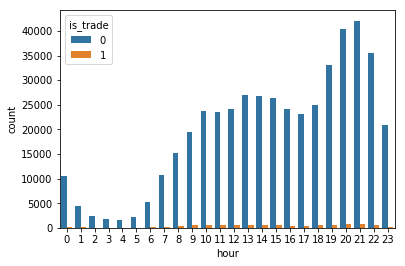

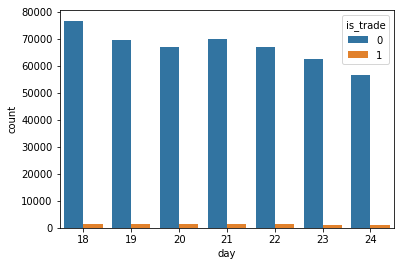

In [6]:
sns.countplot(x='hour', hue="is_trade", data=df)
plt.show()
sns.countplot(x='day', hue="is_trade", data=df)
plt.show()

## handle duplicated

In [ ]:
df = df.drop_duplicates(subset='instance_id', keep='last')

## add features

In [169]:
def getTotalItemCheckCountOnDay(row):
    return df[(df['context_timestamp']<row['context_timestamp'])&
       (df['item_id']==row['item_id'])&
       (df['day']==row['day'])].shape[0]
def getUserColumnCheckCountOnDay(column):
    def countMethod(row):
        return df[(df['context_timestamp']<row['context_timestamp'])&
                  (df[column]==row[column])&
                  (df['user_id']==row['user_id'])&
                  (df['day']==row['day'])].shape[0]
def getUserIsTradeOnColumn(column):
    def checkIsTrade(row):
        tradeSize = df[(df['context_timestamp']<row['context_timestamp'])&
                  (df[column]==row[column])&
                  (df['user_id']==row['user_id'])&
                  (df['day']==row['day'])&
                  (df['is_trade']==1)].shape[0]
        if tradeSize>0:
            return 1
        else:
            return 0
# df['totalItemCheckCountByDay'] = df.apply(getTotalItemCheckCountOnDay, axis=1)
# df['userItemCheckCountByDay'] = df.apply(getUserColumnCheckCountOnDay('item_id'), axis=1)
# df['isTradeOnCatogary1'] = df.apply(getUserColumnCheckCountOnDay('catogary1'), axis=1)
# df['isTradeOnCatogary2'] = df.apply(getUserColumnCheckCountOnDay('catogary2'), axis=1)
# df['isTradeOnCatogary3'] = df.apply(getUserColumnCheckCountOnDay('catogary3'), axis=1)
# df['userCatogary1CheckCountByDay'] = df.apply(getUserColumnCheckCountOnDay('catogary1'), axis=1)
# df['userCatogary2CheckCountByDay'] = df.apply(getUserColumnCheckCountOnDay('catogary2'), axis=1)
# df['userCatogary3CheckCountByDay'] = df.apply(getUserColumnCheckCountOnDay('catogary3'), axis=1)

# split Data

In [168]:
tmpDf = df[['userItemCheckCount', 'is_trade']]
tmpDf[tmpDf['is_trade']==1]

,userItemCheckCount,is_trade
14,0,1
52,0,1
55,0,1
83,0,1
129,1,1
271,0,1
816,0,1
1068,0,1
1109,0,1
1576,0,1


In [116]:
feature_names = [ 'user_gender_id', 'user_occupation_id', 'context_page_id', 'item_city_id', 'hour', 
              'item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 
#                  'item_category_list',
              'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level', 'shop_score_service', 'shop_score_delivery',
              'shop_score_description']
online = True
def split_train_test_data(df, online=False):
    y_column = ['is_trade']
    df = df[feature_names+y_column+['day']]
#     if needOneHot == False:
    if online == False:
        trainData = df[df.day!=24]
        testData = df[df.day==24]
        trainX = trainData.drop(y_column+['day'], axis=1)
        testX = testData.drop(y_column+['day'], axis=1)
        trainY = trainData[y_column]
        testY = testData[y_column]
    else:
        trainX = df.drop(y_column, axis=1)
        trainY = df[y_column]
        testX = []
        testY = []
#     else:
#         oneHotColumns = ['item_category_list', 'user_gender_id', 'user_occupation_id', 'context_page_id', 'item_city_id', 'hour', 'day']
#         df = pd.get_dummies(df, columns=oneHotColumns)
#         if online == False:
#             trainData = df[df.day_24!=1]
#             testData = df[df.day_24==1]
#             trainX = trainData.drop(y_column, axis=1)
#             testX = testData.drop(y_column, axis=1)
#             trainY = trainData[y_column]
#             testY = testData[y_column]
#         else:
#             trainX = df.drop(y_column, axis=1)
#             trainY = df[y_column]
#             testX = []
#             testY = []
    return trainX, trainY, testX, testY

## handle test data

In [121]:
resultOriginalDf = pd.read_csv('../RawData/round1_ijcai_18_test_a_20180301.txt', sep=' ')
resultDf = handleNullItem(resultOriginalDf)
resultDf = handleTimeStamp(resultDf)
resultDf = resultDf[feature_names]

In [119]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy import sparse
from sklearn.linear_model import LogisticRegression

enc = OneHotEncoder()
lb = LabelEncoder()

## generate onehot encoding 
def generateOneHotEncodingColumn(trainX, testX, resultDf, online=False):
    oneHotColumns = ['user_gender_id', 'user_occupation_id', 'context_page_id', 'item_city_id', 'hour']
    for index, column in enumerate(oneHotColumns):
        tmpList = list(trainX[column])+list(testX[column])+list(resultDf[column])
        tmp = lb.fit_transform(tmpList)
        enc.fit(tmp.reshape(-1,1))
        
        x_train = enc.transform(lb.transform(trainX[column]).reshape(-1, 1))
        x_test = enc.transform(lb.transform(testX[column]).reshape(-1, 1))
        x_result = enc.transform(lb.transform(resultDf[column]).reshape(-1, 1))
        
        if index == 0:
            X_train, X_test, X_result = x_train, x_test, x_result
        else:
            X_train, X_test, X_result = sparse.hstack((X_train, x_train)), sparse.hstack((X_test, x_test)), sparse.hstack((X_result, x_result))
            
    X_train = sparse.hstack((X_train, trainX[list(set(trainX.columns)-set(oneHotColumns))]))
    X_test = sparse.hstack((X_test, testX[list(set(testX.columns)-set(oneHotColumns))]))
    X_result = sparse.hstack((X_result, resultDf[list(set(resultDf.columns)-set(oneHotColumns))]))
    if online==True:
        X_train = sparse.vstack((X_train, X_test))
        return X_train, X_result
    else:
        return X_train, X_test, X_result

# Training

In [8]:
import lightgbm as lgb
from sklearn.metrics import log_loss
from sklearn.grid_search import GridSearchCV

c:\ricy\python\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\ricy\python\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## GridSearch

In [ ]:
# trainX, trainY, testX, testY = split_train_test_data(df, online=online, needOneHot=True)
# c, r = trainY.values.shape
# trainY = trainY.values.reshape(c,)
# def gridSearch():
#     gbm = lgb.LGBMClassifier(objective='binary',
#                  num_leaves=64,
#                  learning_rate=0.01,
#                  n_estimators=400,
#                  max_depath=5)
#     params_test = {'max_depth':list(range(5, 14, 2))}
#     gSearch = GridSearchCV(estimator=gbm, param_grid=params_test, scoring='neg_log_loss', cv=5)
#     print('start training')
#     gSearch.fit(trainX.values, trainY)
#     print(gSearch.grid_scores_, gSearch.best_params_, gSearch.best_score_)
# gridSearch()

## Training

In [122]:
trainX, trainY, testX, testY = split_train_test_data(df, online=False)
X_train, X_test, X_result = generateOneHotEncodingColumn(trainX, testX, resultDf)
gbm = lgb.LGBMClassifier(objective='binary',
                 num_leaves=64,
                 learning_rate=0.01,
                 n_estimators=2000,
                 max_depth=7,
                 min_samples_split=100)
evals_result = {}
gbm.fit(X_train, trainY.values,
#         feature_name = list(trainX.columns.values),
        eval_set=[(X_test, testY.values)],
        eval_metric='binary_logloss',
        early_stopping_rounds=100
       )

# gbm.fit(trainX.values, trainY.values,
#         feature_name = list(trainX.columns.values),
#         eval_set=[(X_test, testY.values)],
#         eval_metric='binary_logloss',
#         early_stopping_rounds=100
#        )

c:\ricy\python\lib\site-packages\sklearn\preprocessing\label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ricy\python\lib\site-packages\sklearn\preprocessing\label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	valid_0's binary_logloss: 0.683891
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.674817
[3]	valid_0's binary_logloss: 0.665918
[4]	valid_0's binary_logloss: 0.657194
[5]	valid_0's binary_logloss: 0.648636
[6]	valid_0's binary_logloss: 0.640243
[7]	valid_0's binary_logloss: 0.632007
[8]	valid_0's binary_logloss: 0.623926
[9]	valid_0's binary_logloss: 0.615996
[10]	valid_0's binary_logloss: 0.608212
[11]	valid_0's binary_logloss: 0.600571
[12]	valid_0's binary_logloss: 0.593068
[13]	valid_0's binary_logloss: 0.585701
[14]	valid_0's binary_logloss: 0.578466
[15]	valid_0's binary_logloss: 0.57136
[16]	valid_0's binary_logloss: 0.564379
[17]	valid_0's binary_logloss: 0.557519
[18]	valid_0's binary_logloss: 0.550779
[19]	valid_0's binary_logloss: 0.544156
[20]	valid_0's binary_logloss: 0.537647
[21]	valid_0's binary_logloss: 0.531249
[22]	valid_0's binary_logloss: 0.524959
[23]	valid_0's binary_logloss: 0.518776
[24]	valid_0's binary_loglo

[207]	valid_0's binary_logloss: 0.122819
[208]	valid_0's binary_logloss: 0.122295
[209]	valid_0's binary_logloss: 0.121778
[210]	valid_0's binary_logloss: 0.121267
[211]	valid_0's binary_logloss: 0.120763
[212]	valid_0's binary_logloss: 0.120265
[213]	valid_0's binary_logloss: 0.119773
[214]	valid_0's binary_logloss: 0.119287
[215]	valid_0's binary_logloss: 0.118807
[216]	valid_0's binary_logloss: 0.118333
[217]	valid_0's binary_logloss: 0.117866
[218]	valid_0's binary_logloss: 0.117404
[219]	valid_0's binary_logloss: 0.116948
[220]	valid_0's binary_logloss: 0.116498
[221]	valid_0's binary_logloss: 0.116053
[222]	valid_0's binary_logloss: 0.115614
[223]	valid_0's binary_logloss: 0.115181
[224]	valid_0's binary_logloss: 0.114753
[225]	valid_0's binary_logloss: 0.11433
[226]	valid_0's binary_logloss: 0.113913
[227]	valid_0's binary_logloss: 0.113502
[228]	valid_0's binary_logloss: 0.113095
[229]	valid_0's binary_logloss: 0.112694
[230]	valid_0's binary_logloss: 0.112297
[231]	valid_0's b

[412]	valid_0's binary_logloss: 0.0851883
[413]	valid_0's binary_logloss: 0.0851563
[414]	valid_0's binary_logloss: 0.0851254
[415]	valid_0's binary_logloss: 0.0850938
[416]	valid_0's binary_logloss: 0.0850624
[417]	valid_0's binary_logloss: 0.0850327
[418]	valid_0's binary_logloss: 0.0850022
[419]	valid_0's binary_logloss: 0.0849725
[420]	valid_0's binary_logloss: 0.0849435
[421]	valid_0's binary_logloss: 0.084916
[422]	valid_0's binary_logloss: 0.0848862
[423]	valid_0's binary_logloss: 0.0848595
[424]	valid_0's binary_logloss: 0.0848299
[425]	valid_0's binary_logloss: 0.0848007
[426]	valid_0's binary_logloss: 0.0847729
[427]	valid_0's binary_logloss: 0.0847474
[428]	valid_0's binary_logloss: 0.0847215
[429]	valid_0's binary_logloss: 0.0846957
[430]	valid_0's binary_logloss: 0.0846714
[431]	valid_0's binary_logloss: 0.0846459
[432]	valid_0's binary_logloss: 0.0846202
[433]	valid_0's binary_logloss: 0.0845969
[434]	valid_0's binary_logloss: 0.0845744
[435]	valid_0's binary_logloss: 0.0

[612]	valid_0's binary_logloss: 0.082948
[613]	valid_0's binary_logloss: 0.0829468
[614]	valid_0's binary_logloss: 0.0829426
[615]	valid_0's binary_logloss: 0.0829408
[616]	valid_0's binary_logloss: 0.0829389
[617]	valid_0's binary_logloss: 0.0829356
[618]	valid_0's binary_logloss: 0.0829341
[619]	valid_0's binary_logloss: 0.0829338
[620]	valid_0's binary_logloss: 0.082934
[621]	valid_0's binary_logloss: 0.0829323
[622]	valid_0's binary_logloss: 0.0829299
[623]	valid_0's binary_logloss: 0.082927
[624]	valid_0's binary_logloss: 0.0829252
[625]	valid_0's binary_logloss: 0.0829227
[626]	valid_0's binary_logloss: 0.0829214
[627]	valid_0's binary_logloss: 0.0829208
[628]	valid_0's binary_logloss: 0.0829193
[629]	valid_0's binary_logloss: 0.0829163
[630]	valid_0's binary_logloss: 0.0829164
[631]	valid_0's binary_logloss: 0.0829145
[632]	valid_0's binary_logloss: 0.0829115
[633]	valid_0's binary_logloss: 0.0829092
[634]	valid_0's binary_logloss: 0.0829089
[635]	valid_0's binary_logloss: 0.082

[816]	valid_0's binary_logloss: 0.0827356
[817]	valid_0's binary_logloss: 0.0827355
[818]	valid_0's binary_logloss: 0.082735
[819]	valid_0's binary_logloss: 0.0827344
[820]	valid_0's binary_logloss: 0.0827343
[821]	valid_0's binary_logloss: 0.0827341
[822]	valid_0's binary_logloss: 0.0827336
[823]	valid_0's binary_logloss: 0.0827318
[824]	valid_0's binary_logloss: 0.0827319
[825]	valid_0's binary_logloss: 0.0827328
[826]	valid_0's binary_logloss: 0.0827324
[827]	valid_0's binary_logloss: 0.0827315
[828]	valid_0's binary_logloss: 0.0827312
[829]	valid_0's binary_logloss: 0.0827307
[830]	valid_0's binary_logloss: 0.0827304
[831]	valid_0's binary_logloss: 0.0827303
[832]	valid_0's binary_logloss: 0.082729
[833]	valid_0's binary_logloss: 0.0827281
[834]	valid_0's binary_logloss: 0.0827285
[835]	valid_0's binary_logloss: 0.0827294
[836]	valid_0's binary_logloss: 0.0827298
[837]	valid_0's binary_logloss: 0.0827287
[838]	valid_0's binary_logloss: 0.0827283
[839]	valid_0's binary_logloss: 0.08

[1013]	valid_0's binary_logloss: 0.0826764
[1014]	valid_0's binary_logloss: 0.0826765
[1015]	valid_0's binary_logloss: 0.0826776
[1016]	valid_0's binary_logloss: 0.0826786
[1017]	valid_0's binary_logloss: 0.0826786
[1018]	valid_0's binary_logloss: 0.0826774
[1019]	valid_0's binary_logloss: 0.0826767
[1020]	valid_0's binary_logloss: 0.0826759
[1021]	valid_0's binary_logloss: 0.0826754
[1022]	valid_0's binary_logloss: 0.0826746
[1023]	valid_0's binary_logloss: 0.082675
[1024]	valid_0's binary_logloss: 0.0826742
[1025]	valid_0's binary_logloss: 0.0826731
[1026]	valid_0's binary_logloss: 0.0826734
[1027]	valid_0's binary_logloss: 0.0826737
[1028]	valid_0's binary_logloss: 0.0826728
[1029]	valid_0's binary_logloss: 0.0826732
[1030]	valid_0's binary_logloss: 0.0826727
[1031]	valid_0's binary_logloss: 0.0826727
[1032]	valid_0's binary_logloss: 0.0826718
[1033]	valid_0's binary_logloss: 0.0826726
[1034]	valid_0's binary_logloss: 0.0826729
[1035]	valid_0's binary_logloss: 0.0826724
[1036]	valid

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.01, max_depth=7, min_child_samples=20,
        min_child_weight=0.001, min_samples_split=100, min_split_gain=0.0,
        n_estimators=2000, n_jobs=-1, num_leaves=64, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

# Predict 

In [114]:
def predictResult(df):
    trainX, trainY, testX, testY = split_train_test_data(df)
    X_train, X_result = generateOneHotEncodingColumn(trainX, testX, resultDf, online=True)
    Y_train = np.append(trainY.values, testY.values)
    result_gbm = lgb.LGBMClassifier(objective='binary',
                     num_leaves=64,
                     learning_rate=0.01,
                     n_estimators=2000,
                     max_depth=7,
                     min_samples_split=100)
    result_gbm.fit(X_train, Y_train)
    resultOriginalDf['predicted_score'] = result_gbm.predict_proba(X_result)[:, 1]
    resultOriginalDf[['instance_id', 'predicted_score']].to_csv('../baseline.csv', index=False,sep=' ')

# predictResult(df)

In [124]:
df.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'time', 'day', 'hour'],
      dtype='object')

In [126]:
df.head(5)

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade,time,day,hour
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1.975590e+18,3.948283e+18,3,3.0,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 10:09:04,18,10
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1.975590e+18,3.948283e+18,3,3.0,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 12:00:32,18,12
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1.975590e+18,3.948283e+18,3,3.0,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 03:04:12,18,3
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1.975590e+18,3.948283e+18,3,3.0,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 06:17:50,18,6
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1.975590e+18,3.948283e+18,3,3.0,4,14,...,4,1.0,5002,1.0,1.0,1.0,0,2018-09-18 19:48:40,18,19


In [131]:
df.groupby('instance_id').size().sort_values()

instance_id
3823219312755          1
6149141723940138517    1
6149127146145292753    1
6149122011659186256    1
6149112165698337450    1
6149077952620131941    1
6149049431063412758    1
6149034723887433814    1
6149022496418369294    1
6149019778985454809    1
6149002752778826272    1
6148977769168512570    1
6148960673351606978    1
6148952808990361037    1
6148934536767752141    1
6148926648914410840    1
6148879935403639290    1
6148860907093987564    1
6148860428352552643    1
6148850187781294400    1
6148824042893641674    1
6148815427354107235    1
6148810540068603305    1
6148773597997187005    1
6148766296671391645    1
6148742322682166004    1
6149171491857749858    1
6148724975114543281    1
6149201579573688325    1
6149211602000898797    1
                      ..
8495813758894672234    2
833314485724646554     2
6020113693432894079    2
191012710137081307     2
4713809052247380232    2
7773970221732336968    2
1037061371711078396    2
4505908068775890459    2
7448305858307

(478138, 30)

In [ ]:
def getUserIsTradeOnCategory(row):
    return 